In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits # default digit dataset provided by sklearn 

In [4]:
digits= load_digits() # load dataset

In [5]:
dir(digits) # checked wt dataset contained

['DESCR', 'data', 'images', 'target', 'target_names']

In [7]:
digits.data[0] # check one sample out of 1797 and its of 8x8 dimention = 64 elements of array

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

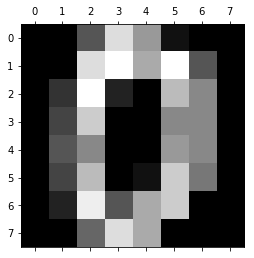

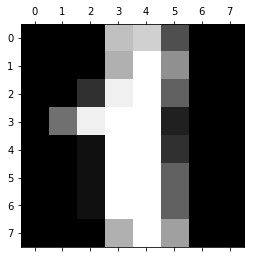

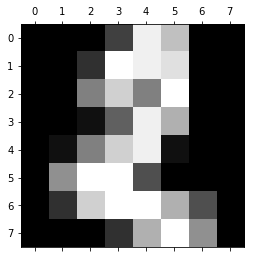

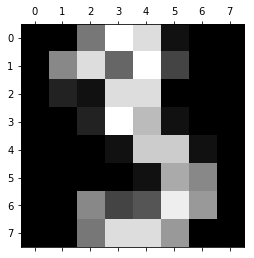

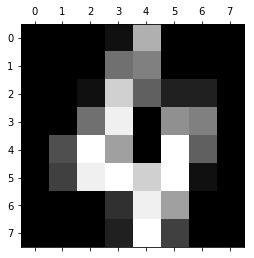

In [9]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [10]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# we have I/P and O/p arguments from trainig stets and we divided into test and train sets
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [13]:
len(X_train)

1437

In [14]:
len(X_test)

360

In [17]:
from sklearn.linear_model import LogisticRegression
dg_model = LogisticRegression()

In [18]:
dg_model.fit(X_train,y_train) # X_train - hand written charactor images and y_train has corresponding charactors(no.s)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
dg_model.score(X_test,y_test) # --> 97% approx. model accuracy

0.9638888888888889

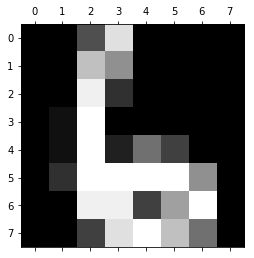

In [23]:
plt.matshow(digits.images[67]) # testing - 67 is index of that image 

In [24]:
digits.target[67]

6

In [69]:
dg_model.predict(digits.data[51:59])

array([2, 7, 8, 2, 0, 1, 2, 6])

In [73]:
y_predict = dg_model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  3,  1],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 29,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 27]], dtype=int64)

Text(69,0.5,'Truth')

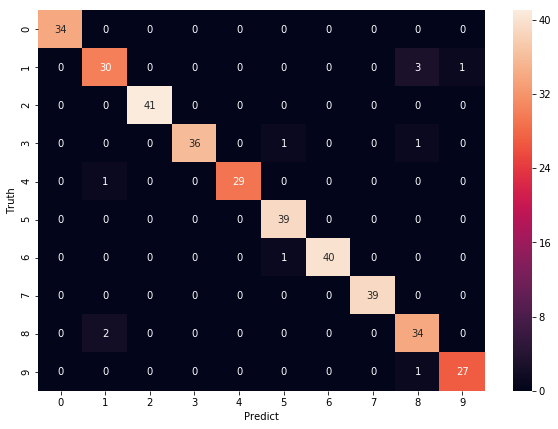

In [74]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')

# Matrix Explain -- 

#1 . Lets take first value 37 -> "37 times Truth was 0 and my model predicted is to be 0"
#2 . 2nd col.-9th row value ( 2 ) -> "2 times my TRUTH  was 8" - means 'i feed my model with image of'8' but my model said no it is '1'
# so in BLUE section instances (numbers other than 0) thoes r not doing good, means model is not working CORRECT